# Proyek Klasifikasi Gambar: Data Historis BMRI (Saham)
- **Nama:** Yoan Rifqi Candra
- **Email:** yoanrifqicandra@gmail.com
- **ID Dicoding:** Yoan Rifqi Candra

## Business Understanding

### Latar Belakang

Bank Mandiri (kode saham: BMRI) merupakan salah satu bank terbesar di Indonesia yang memiliki pengaruh besar terhadap sektor keuangan nasional. Sebagai perusahaan publik yang tercatat di Bursa Efek Indonesia (BEI), harga saham BMRI mencerminkan persepsi pasar terhadap kinerja perusahaan serta kondisi makroekonomi Indonesia secara keseluruhan. Dengan tingginya volume transaksi dan fluktuasi harga yang signifikan, prediksi harga saham BMRI menjadi topik yang menarik dan penting untuk investor, analis, maupun pengambil keputusan.

Masalah utama dalam dunia investasi adalah tingginya ketidakpastian pasar. Oleh karena itu, pengembangan model prediksi berbasis machine learning yang mampu mengidentifikasi pola historis dan tren masa depan dari harga saham dapat memberikan nilai tambah besar dalam pengambilan keputusan investasi.

Menurut studi oleh Atsalakis dan Valavanis (2009), penggunaan metode kecerdasan buatan seperti Artificial Neural Networks (ANN) dan Support Vector Machine (SVM) telah terbukti mampu meningkatkan akurasi dalam memprediksi harga saham dibandingkan pendekatan statistik konvensional. Oleh karena itu, penelitian ini akan mengeksplorasi model machine learning dalam memprediksi harga saham BMRI dengan fokus pada akurasi dan keandalan prediksi.

Referensi:
Atsalakis, G. S., & Valavanis, K. P. (2009). Surveying stock market forecasting techniques–Part II: Soft computing methods. Expert Systems with Applications, 36(3), 5932–5941.

### Problem Statements
1. Bagaimana tren harga saham BMRI berkembang dari waktu ke waktu?
2. Kapan waktu yang tepat untuk membeli atau menjual saham BMRI?
3. Bagaimana pengaruh volume transaksi terhadap volatilitas harga saham?
4. Bagaimana memprediksi harga saham BMRI di masa depan berdasarkan data historis?

### Goals
1. Menyediakan visualisasi tren historis saham BMRI untuk memberikan wawasan tentang arah pergerakan harga dalam jangka waktu tertentu.
2. Membantu investor menentukan waktu entry dan exit berdasarkan sinyal yang diperoleh dari analisis teknikal dan tren musiman.
3. Mengevaluasi hubungan antara volume transaksi dan harga untuk memahami apakah volume dapat menjadi indikator pendukung pengambilan keputusan.
4. Membangun model prediksi harga saham menggunakan Prophet untuk menghasilkan estimasi harga saham di masa depan.

#### Tujuan Analisis
- Menyajikan visualisasi pergerakan harga saham BMRI dalam periode tertentu (harian/minggu/bulanan)
- Menghitung indikator teknikal seperti Moving Average, RSI, Bollinger Bands, dll
- Melakukan segmentasi waktu berdasarkan tren (bullish, bearish, sideways)
- Melakukan korelasi antara volume dan harga untuk mengukur sentimen pasar
- Memprediksi harga saham untuk mengidentifikasi peluang di masa depan

## Data Understanding

### Sumber Data
Dataset yang digunakan berasal dari data historis harga saham PT Bank Mandiri (Persero) Tbk (kode: BMRI) yang diperoleh melalui platform Investing.com Indonesia. Data tersebut mencakup informasi harian mulai dari awal tahun hingga data terbaru tahun 2025.

### Variabel-variabel pada Dataset Saham BMRI adalah sebagai berikut:
- Date : Tanggal pencatatan harga saham
- Open : Harga pembukaan pada hari tersebut
- High : Harga tertinggi dalam satu hari
- Low : Harga terendah dalam satu hari
- Close : Harga penutupan pada akhir hari
- Volume : Jumlah Saham yang diperdagang hari tersebut
- Change(%) : Selisih antara harga penutupan dan harga pembukaan pada hari tersebut

### Proses pembersihan data
- Mengubah tipe data untuk kolom Date dari object menjadi datetime
- Mengubah nama kolom agar lebih mudah diingat
- Menghilangkan tanda persen pada kolom "Change"

In [ ]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt
from prophet import Prophet

import statsmodels.api as sm
from scipy import stats
from plotly import tools
from chart_studio.plotly import plot, iplot
import plotly.figure_factory as ff
import chart_studio.tools as tls
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

#Modeling
from prophet import Prophet

import matplotlib.dates as mdates
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

#Evaluation
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric

c:\Users\Yoan Rifqi\Downloads\Project Analysis Personal\Predictive Analysis Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset
data = pd.read_csv("Data Historis BMRI.csv")
data

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,16/04/2025,4.670,4.730,4.740,4.670,"64,70M","-0,85%"
1,15/04/2025,4.710,4.800,4.820,4.710,"231,01M","-0,84%"
2,14/04/2025,4.750,4.650,4.750,4.650,"423,72M","-6,86%"
3,11/04/2025,5.100,5.000,5.175,4.950,"384,96M","1,49%"
4,10/04/2025,5.025,5.200,5.225,4.970,"559,97M","6,69%"
...,...,...,...,...,...,...,...
1019,22/01/2021,7.200,7.275,7.350,7.125,"58,68M","-0,69%"
1020,21/01/2021,7.250,7.375,7.375,7.200,"41,03M","-1,69%"
1021,20/01/2021,7.375,7.000,7.450,7.000,"110,47M","5,73%"
1022,19/01/2021,6.975,7.000,7.025,6.850,"38,92M","0,72%"


In [ ]:
# Mengganti nama kolom DataFrame agar lebih mudah digunakan dan konsisten dengan standar penamaan bahasa Inggris
data.rename(columns={
    'Tanggal': 'Date',         # Mengubah 'Tanggal' menjadi 'Date'
    'Terakhir': 'Close',       # Mengubah 'Terakhir' menjadi 'Close'
    'Pembukaan': 'Open',       # Mengubah 'Pembukaan' menjadi 'Open'
    'Tertinggi': 'High',       # Mengubah 'Tertinggi' menjadi 'High'
    'Terendah': 'Low',         # Mengubah 'Terendah' menjadi 'Low'
    'Vol': 'Volume',           # Mengubah 'Vol' menjadi 'Volume'
    'Perubahan%': 'Change(%)'  # Mengubah 'Perubahan%' menjadi 'Change(%)'
}, inplace=True)

# Menampilkan DataFrame
data

,Date,Close,Open,High,Low,Vol.,Change(%)
0,16/04/2025,4.670,4.730,4.740,4.670,"64,70M","-0,85%"
1,15/04/2025,4.710,4.800,4.820,4.710,"231,01M","-0,84%"
2,14/04/2025,4.750,4.650,4.750,4.650,"423,72M","-6,86%"
3,11/04/2025,5.100,5.000,5.175,4.950,"384,96M","1,49%"
4,10/04/2025,5.025,5.200,5.225,4.970,"559,97M","6,69%"
...,...,...,...,...,...,...,...
1019,22/01/2021,7.200,7.275,7.350,7.125,"58,68M","-0,69%"
1020,21/01/2021,7.250,7.375,7.375,7.200,"41,03M","-1,69%"
1021,20/01/2021,7.375,7.000,7.450,7.000,"110,47M","5,73%"
1022,19/01/2021,6.975,7.000,7.025,6.850,"38,92M","0,72%"


In [ ]:
# Fungsi untuk membersihkan kolom volume dari karakter 'M' dan mengonversinya menjadi float
def clean_volume_column(df, column_name):
    # Menghapus karakter 'M' (yang menandakan jutaan) dari nilai-nilai dalam kolom
    df[column_name] = df[column_name].str.replace('M', '', regex=False)
    
    # Mengganti tanda koma (,) dengan titik (.) agar sesuai format desimal Python
    df[column_name] = df[column_name].str.replace(',', '.', regex=False)
    
    # Mengonversi nilai string menjadi float
    df[column_name] = df[column_name].astype(float)
    
    return df

# Terapkan fungsi ke kolom 'Vol.'
data = clean_volume_column(data, 'Vol.')

# Menampilkan DataFrame
data

,Date,Close,Open,High,Low,Vol.,Change(%)
0,16/04/2025,4.670,4.730,4.740,4.670,64.70,"-0,85%"
1,15/04/2025,4.710,4.800,4.820,4.710,231.01,"-0,84%"
2,14/04/2025,4.750,4.650,4.750,4.650,423.72,"-6,86%"
3,11/04/2025,5.100,5.000,5.175,4.950,384.96,"1,49%"
4,10/04/2025,5.025,5.200,5.225,4.970,559.97,"6,69%"
...,...,...,...,...,...,...,...
1019,22/01/2021,7.200,7.275,7.350,7.125,58.68,"-0,69%"
1020,21/01/2021,7.250,7.375,7.375,7.200,41.03,"-1,69%"
1021,20/01/2021,7.375,7.000,7.450,7.000,110.47,"5,73%"
1022,19/01/2021,6.975,7.000,7.025,6.850,38.92,"0,72%"


In [ ]:
# Fungsi untuk membersihkan kolom persentase perubahan dan mengonversinya menjadi float
def clean_change_column(df, column_name):
    # Menghapus simbol persen (%) dari nilai-nilai dalam kolom
    df[column_name] = df[column_name].str.replace('%', '', regex=False)
    
    # Mengganti tanda koma dengan titik agar sesuai format desimal
    df[column_name] = df[column_name].str.replace(',', '.', regex=False)
    
    # Mengubah nilai string menjadi float
    df[column_name] = df[column_name].astype(float)
    
    return df

# Terapkan fungsi pada kolom 'Change(%)'
data = clean_change_column(data, 'Change(%)')

# Menampilkan DataFrame
data


,Date,Close,Open,High,Low,Vol.,Change(%)
0,16/04/2025,4.670,4.730,4.740,4.670,64.70,-0.85
1,15/04/2025,4.710,4.800,4.820,4.710,231.01,-0.84
2,14/04/2025,4.750,4.650,4.750,4.650,423.72,-6.86
3,11/04/2025,5.100,5.000,5.175,4.950,384.96,1.49
4,10/04/2025,5.025,5.200,5.225,4.970,559.97,6.69
...,...,...,...,...,...,...,...
1019,22/01/2021,7.200,7.275,7.350,7.125,58.68,-0.69
1020,21/01/2021,7.250,7.375,7.375,7.200,41.03,-1.69
1021,20/01/2021,7.375,7.000,7.450,7.000,110.47,5.73
1022,19/01/2021,6.975,7.000,7.025,6.850,38.92,0.72


In [ ]:
# Menampilkan kolom 'Kode'
data['Kode'] = 'BMRI'

In [ ]:
# Memeriksa apakah ada nilai yang hilang dalam DataFrame
data.isnull().sum()

Date         0
Close        0
Open         0
High         0
Low          0
Vol.         0
Change(%)    0
Kode         0
dtype: int64

In [ ]:
# Konversi kolom 'Date' menjadi tipe data datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [ ]:
# Memeriksa tipe data dari setiap kolom dalam DataFrame
data.dtypes

Date         datetime64[ns]
Close               float64
Open                float64
High                float64
Low                 float64
Vol.                float64
Change(%)           float64
Kode                 object
dtype: object

In [ ]:
# Memeriksa apakah ada duplikasi dalam DataFrame
data.duplicated().sum()

np.int64(0)

In [ ]:
# Memeriksa informasi umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1024 non-null   datetime64[ns]
 1   Close      1024 non-null   float64       
 2   Open       1024 non-null   float64       
 3   High       1024 non-null   float64       
 4   Low        1024 non-null   float64       
 5   Vol.       1024 non-null   float64       
 6   Change(%)  1024 non-null   float64       
 7   Kode       1024 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 64.1+ KB


In [ ]:
# Mendapatkan ringkasan statistik dari DataFrame
data.describe()

,Date,Close,Open,High,Low,Vol.,Change(%)
count,1024,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,2023-02-22 08:05:09.375000064,5.026965,5.030024,5.089081,4.967398,104.926650,0.001279
min,2021-01-18 00:00:00,2.825000,2.825000,2.875000,2.800000,7.070000,-50.000000
25%,2022-01-27 18:00:00,3.838000,3.850000,3.875000,3.813000,63.185000,-0.970000
50%,2023-02-11 12:00:00,5.081500,5.075000,5.125000,5.025000,88.115000,0.000000
75%,2024-03-09 06:00:00,6.075000,6.075000,6.150000,6.025000,124.472500,1.050000
max,2025-04-16 00:00:00,7.450000,7.450000,7.550000,7.400000,738.450000,8.810000
std,NaN,1.313988,1.314307,1.330760,1.297806,70.961525,2.459295


Dataset ini terdiri dari 1024 entri yang mencakup periode januari 2021 hingga April 2025, menunjukkan harga stabil dengan kisaran 5-6.15 (deviasi standar ~1.3) dan volume perdagangan bervariasi (104.93-124.47, deviasi 70.96). Namun, nilai rata-rata harga dan volume yang tidak wajar yaitu 1024 yang mengindikasikan kemungkinan kesalahan perhitungan. Perubahan harga harian relatif kecil yaitu ~50% hingga +1.05%.

## Data Preparation

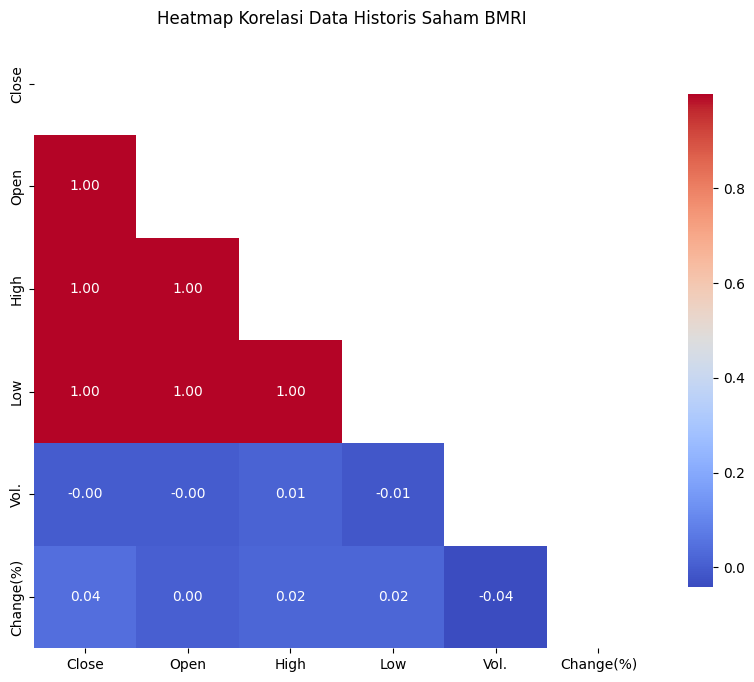

In [13]:
# Hitung korelasi hanya pada kolom numerik
corr_matrix = data.select_dtypes(include=[np.number]).corr()

# Buat mask segitiga atas
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap Korelasi Data Historis Saham BMRI')
plt.show()

Heatmap korelasi data historis saham BMRI menunjukkan korelasi positif yang sangat kuat yaitu mendekati 1.00 antara harga Close, Open, High, dan Low yang mengindikasikan pergerakan searah yang erat antar variabel harga ini. Sebaliknya, volume perdagangan dan perubahan persentase harga memperlihatkan korelasi yang lemah dengan variabel yang lainnya, bahkan cenderung memiliki korelasi negatif yang sangat kecil sehingga menyiratkan bahwa perubahan harga dan volume perdagangan tidak memiliki hubungan linear yang signifikan.

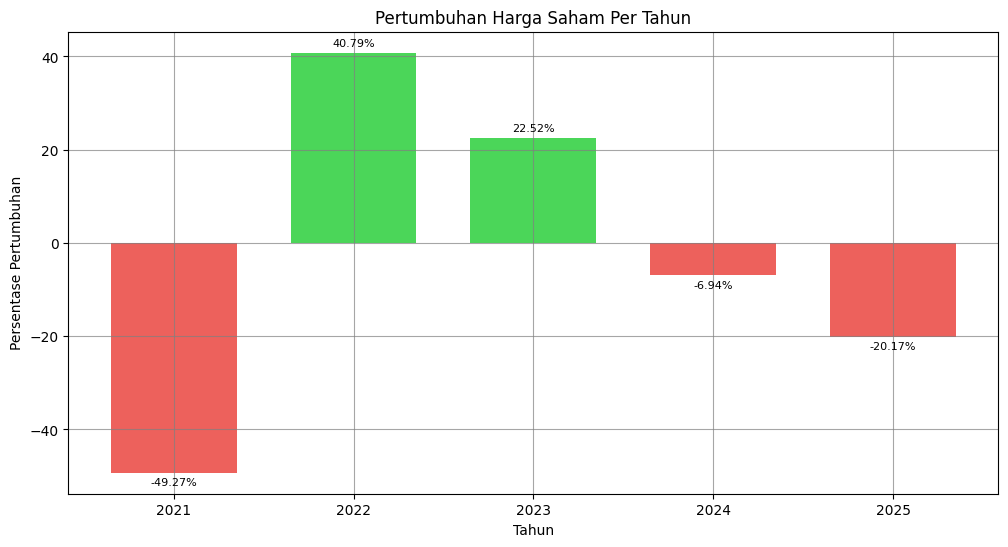

In [ ]:
# Pastikan kolom 'Date' bertipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# Dapatkan daftar tahun unik yang sudah diurutkan
tahun_list = sorted(data['Date'].dt.year.unique())

# Inisialisasi list untuk menyimpan pertumbuhan tiap tahun
pertumbuhan_per_tahun = []

# Loop untuk menghitung pertumbuhan harga saham per tahun
for tahun in tahun_list:
    data_tahun = data[data['Date'].dt.year == tahun]  # Filter data berdasarkan tahun
    if not data_tahun.empty:
        # Ambil harga pada awal dan akhir tahun
        harga_awal = data_tahun[data_tahun['Date'] == data_tahun['Date'].min()]['Close'].values.item()
        harga_akhir = data_tahun[data_tahun['Date'] == data_tahun['Date'].max()]['Close'].values.item()
        
        # Hitung pertumbuhan dalam persentase
        growth = ((harga_akhir - harga_awal) / harga_awal) * 100
        pertumbuhan_per_tahun.append(growth)

# Menentukan warna bar berdasarkan pertumbuhan (hijau = naik, merah = turun)
warna_bars = ['#4bd659' if growth >= 0 else '#ed615c' for growth in pertumbuhan_per_tahun]

# Visualisasi pertumbuhan tahunan
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(tahun_list, pertumbuhan_per_tahun, color=warna_bars, width=0.7)

# Tambahkan label persentase pada setiap bar
for i, v in enumerate(pertumbuhan_per_tahun):
    ax.text(
        tahun_list[i],                            # Posisi x
        v + (1 if v >= 0 else -1),                # Posisi y (atas jika positif, bawah jika negatif)
        f'{round(v, 2)}%',                        # Teks label
        ha='center',                              # Horizontal align
        va='bottom' if v >= 0 else 'top',         # Vertical align
        color='black', fontsize=8                 # Warna dan ukuran teks
    )

# Label sumbu dan judul
ax.set_xlabel('Tahun')
ax.set_ylabel('Persentase Pertumbuhan')
ax.set_title('Pertumbuhan Harga Saham Per Tahun')

# Tambahkan grid untuk membantu pembacaan grafik
ax.grid(True, linestyle='-', color='gray', alpha=0.7)

# Tampilkan grafik
plt.show()

Grafik batang tersebut menggambarkan persentase pertumbuhan harga saham per tahun. Terlihat bahwa pada tahun 2021 dan 2025, saham mengalami penurunan yang signifikan, masing-masing sebesar -49.27% dan -20.17%. Sebaliknya, pertumbuhan positif tercatat pada tahun 2022 dan 2023 dengan peningkatan sebesar 40.79% dan 22.52% secara berturut-turut. Sementara itu, pada tahun 2024 terjadi penurunan yang relatif kecil sebesar -6.94%. Secara keseluruhan, pertumbuhan harga saham menunjukkan volatilitas yang cukup tinggi selama periode 2021 hingga 2025.

In [ ]:
# Membuat grafik garis untuk kolom 'Close' terhadap waktu
fig = px.line(
    data, 
    x='Date', 
    y='Close', 
    title='Grafik Pergerakan Harga Saham BMRI', 
    labels={'Close': 'Harga Saham', 'Date': 'Tahun'}, 
    line_shape='linear', 
    template='plotly_dark'  # Tema gelap
)

# Format sumbu-x agar hanya menampilkan tahun
fig.update_xaxes(
    tickformat="%Y",              # Format tahun saja (YYYY)
    gridcolor='gray',             # Warna grid
    gridwidth=1,
    zerolinecolor='gray',
    zerolinewidth=1
)

# Format sumbu-y
fig.update_yaxes(
    title_text='Harga Saham',
    gridcolor='gray',
    gridwidth=1,
    zerolinecolor='gray',
    zerolinewidth=1
)

# Menentukan ukuran plot dan gaya visual
fig.update_layout(
    width=800, 
    height=500, 
    title=dict(x=0.5, font=dict(size=16, color='white')),  # Posisi dan gaya judul
    legend=dict(
        x=0, y=1,
        traceorder='normal',
        orientation='v',
        font=dict(color='white')   # Warna font legenda
    ),
    plot_bgcolor='black',         # Warna latar belakang plot
    paper_bgcolor='black',        # Warna latar belakang keseluruhan
    font=dict(color='white')      # Warna semua teks
)

# Menampilkan grafik
fig.show()

Grafik tersebut menunjukkan pergerakan saham BMRI dari tahun 2020 hingga pertengahan tahun 2025. Terlihat adanya penurunan harga yang signifikan di awal tahun 2021, diikuti dengan tren kenaikan yang fluktuatif hingga mencapai puncaknya di sekitar awal tahun 2024. Setelah mencapai titik tertinggi, harga saham mengalami penurunan yang cukup tajam hingga pertengahan 2025. Secara keseluruhan, grafik ini menggambarkan volatilitas harga saham BMRI selama periode waktu tersebut dengan fase pertumbuhan yang signifikan namun juga diikuti oleh koreksi harga yang substansial.

In [ ]:
# 1. Ambil daftar kode saham unik dari DataFrame
kode_saham_list = data['Kode'].unique()

# 2. Pilih palet warna untuk membedakan tiap saham
warna_saham = px.colors.qualitative.Set1  # Palet warna Set1 dari Plotly

# 3. Loop untuk membuat grafik per saham
for i, kode in enumerate(kode_saham_list):
    # a. Filter data untuk setiap kode saham
    df_saham = data[data['Kode'] == kode]
    
    # b. Buat grafik garis (line chart) volume saham
    fig = px.line(
        df_saham, 
        x='Date', 
        y='Vol.', 
        color='Kode',
        title=f'Volume Saham {kode} 2021-2025',
        labels={'Vol.': 'Volume', 'Date': 'Tahun', 'Kode': 'Saham'},
        line_shape='linear',
        color_discrete_sequence=[warna_saham[i % len(warna_saham)]]  # Warna unik per saham
    )
    
    # c. Format sumbu x dan y
    fig.update_xaxes(tickformat='%Y', gridcolor='gray')
    fig.update_yaxes(gridcolor='gray')
    
    # d. Desain tampilan visual
    fig.update_layout(
        width=800,
        height=500,
        title=dict(x=0.5, font=dict(size=16, color='white')),
        legend=dict(
            x=0, y=1,
            traceorder='normal',
            orientation='v',
            font=dict(color='white')
        ),
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(color='white')
    )
    
    # e. Tampilkan grafik
    fig.show()

Grafik tersebut menampilkan volume perdagangan saham BMRI dari tahun 2021 hingga pertengahan tahun 2025, dimana fluktuasi volume harian terlihat cukup signifikan dengan beberapa lonjakan volume yang menonjol di berbagai periode waktu, terutama menjelang akhir tahun 2022 hingga pertengahan tahun 2024 dan peningkatan dramatis di awal tahun 2025 yang mengindikasikan adanya aktivitas perdagangan yang tinggi pada momen-momen tersebut di tengah volume perdagangan harian yang relatif lebih rendah secara umum

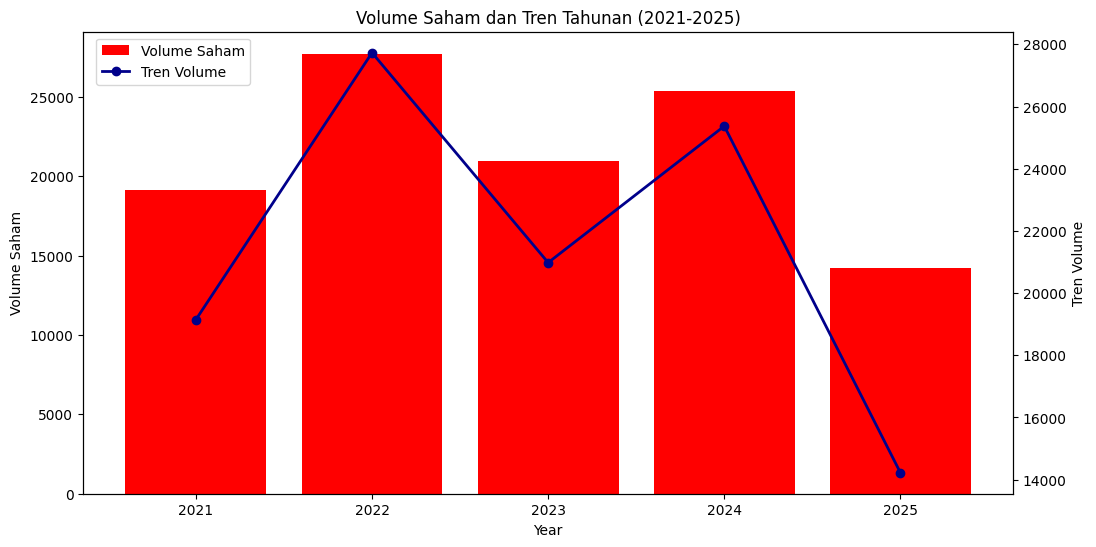

In [17]:
# Ubah kolom 'date' menjadi tipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# Buat kolom 'year' dari kolom 'date'
data['Year'] = data['Date'].dt.year

# Kelompokkan data berdasarkan tahun dan hitung total volume saham per tahun
df_yearly = data.groupby('Year')['Vol.'].sum().reset_index()

# Plot bar chart dan line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (volume saham per tahun)
ax1.bar(df_yearly['Year'], df_yearly['Vol.'], color='red', label='Volume Saham')

# Buat axis kedua untuk line chart (volume saham per tahun)
ax2 = ax1.twinx()

# Line chart (tren volume saham per tahun)
ax2.plot(df_yearly['Year'], df_yearly['Vol.'], color='darkblue', label='Tren Volume', marker='o', linestyle='-', linewidth=2)

# Menambahkan label, judul, dan grid
ax1.set_xlabel('Year')
ax1.set_ylabel('Volume Saham', color='black')
ax2.set_ylabel('Tren Volume', color='black')
plt.title('Volume Saham dan Tren Tahunan (2021-2025)')
#ax1.grid(True)

# Tambahkan legend
fig.legend(loc="upper left", bbox_to_anchor=(0.13, 0.88))

# Tampilkan grafik
plt.show()

In [ ]:
# Membuat objek candlestick menggunakan data harga saham
Trade = go.Candlestick(
    x=data['Date'],          # Tanggal transaksi
    open=data['Open'],       # Harga pembukaan
    high=data['High'],       # Harga tertinggi
    low=data['Low'],         # Harga terendah
    close=data['Close']      # Harga penutupan
)

# Mengatur layout grafik
layout = {
    'title': {
        'text': 'Perkembangan Harga Saham BMRI',  # Judul grafik
        'x': 0.5,              # Posisi horizontal (tengah)
        'xanchor': 'center',   # Titik acuan horizontal
        'yanchor': 'top'       # Titik acuan vertikal
    },
    'xaxis': {
        'title': 'Waktu',  # Label sumbu X
        'rangeslider': {'visible': False},  # Sembunyikan range slider default
        'gridcolor': 'rgba(255, 255, 255, 0.2)',  # Warna garis bantu X
    },
    'yaxis': {
        'title': 'Harga Saham (IDR)',  # Label sumbu Y
        'gridcolor': 'rgba(255, 255, 255, 0.2)',  # Warna garis bantu Y
    },
    'paper_bgcolor': 'black',  # Warna latar luar plot
    'plot_bgcolor': 'black',   # Warna latar dalam plot
    'font': {
        'color': 'white'  # Warna teks keseluruhan
    },
    'width': 1200,   # Lebar visualisasi
    'height': 600    # Tinggi visualisasi
}

# Membuat dan menampilkan grafik
fig = go.Figure(data=Trade, layout=layout)
fig.show()

Bagian kode menunjukkan bahwa beberapa kolom ('Open', 'High', 'Low', 'Vol', 'Change(%)') sedang dihapus dari DataFrame yang bernama model_df. Kemudian, kolom yang tersisa diubah namanya menjadi 'ds' untuk kolom 'Date' dan 'y' untuk kolom 'Close' dan perubahan ini dilakukan langsung pada DataFrame. Bagian tabel di bawahnya menampilkan sebagian kecil dari Dataframe model_df setelah operasi ini dilakukan dimana terlihat kolom 'ds' yang berisi tanggal dan kolom 'y' yang berisi nilai harga. Tujuan proses ini dilakukan untuk menyesuaikan data dengan kebutuhan model prediksi (memilih kolom relevan dan mengubah nama agar sesuai format input model) dan menyederhanakan dataset.

## Data Preparation

In [ ]:
# Inisialisasi model Prophet
model = Prophet()

# Menghapus kolom yang tidak diperlukan untuk peramalan
model_df = data.drop(['Open', 'High', 'Low', 'Vol.', 'Change(%)'], axis=1)

# Mengganti nama kolom agar sesuai format Prophet
model_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

# Menampilkan DataFrame hasil akhir
model_df

,ds,y,Kode,Year
0,2025-04-16,4.670,BMRI,2025
1,2025-04-15,4.710,BMRI,2025
2,2025-04-14,4.750,BMRI,2025
3,2025-04-11,5.100,BMRI,2025
4,2025-04-10,5.025,BMRI,2025
...,...,...,...,...
1019,2021-01-22,7.200,BMRI,2021
1020,2021-01-21,7.250,BMRI,2021
1021,2021-01-20,7.375,BMRI,2021
1022,2021-01-19,6.975,BMRI,2021


## Modelling

In [20]:
# Inisialisasi dan latih model dengan penyesuaian parameter
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality = 'auto'
)

# Latih model
model.fit(model_df)


10:37:32 - cmdstanpy - INFO - Chain [1] start processing
10:37:33 - cmdstanpy - INFO - Chain [1] done processing


Proses inisiasi dan pelatihan model Prophet. Pertama, sebuah objek model Prophet dibuat dengan mengaktifkan seasonalitas tahunan (yearly_seasonality='auto'). Kemudian, model yang telah diinisialisasi ini dilatih menggunakan data yang telah dipersiapkan sebelumnya yang disimpan dalam dataframe bernama model_df. Proses pelatihan ini memungkinkan model untuk mempelajari pola temporal dalam data historis sehingga dapat digunakan untuk melakukan prediksi masa depan.

In [21]:
# Membuat tanggal prediksi
future_prices = model.make_future_dataframe(periods=365)

# prediksi harga
predict = model.predict(future_prices)
predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1384,2026-04-12,2.692454,0.773235,4.765553
1385,2026-04-13,2.691281,0.833914,4.740258
1386,2026-04-14,2.677948,0.797213,4.860535
1387,2026-04-15,2.668502,0.818164,4.776658
1388,2026-04-16,2.689321,0.754694,4.856245


Dataframe ``futures_prices`` dibuat untuk memuat tanggal-tanggal di masa depan sebanyak 365 periode (kemungkinan hari) yang akan digunakan sebagai dasar untuk prediksi. Kemudian, fungsi predict() dari model Prophet diterapkan pada ``futures_prices`` untuk menghasilkan prediksi harga. Sebagian kecil dari hasil prediksi yang berisi kolom tanggal ds, nilai prediksi yhat, batas bawah interval kepercayaan yhat_upper, ditampilkan. Ini memberikan gambaran prediksi harga beserta rentang ketidakpastiannya untuk periode waktu ke depan.

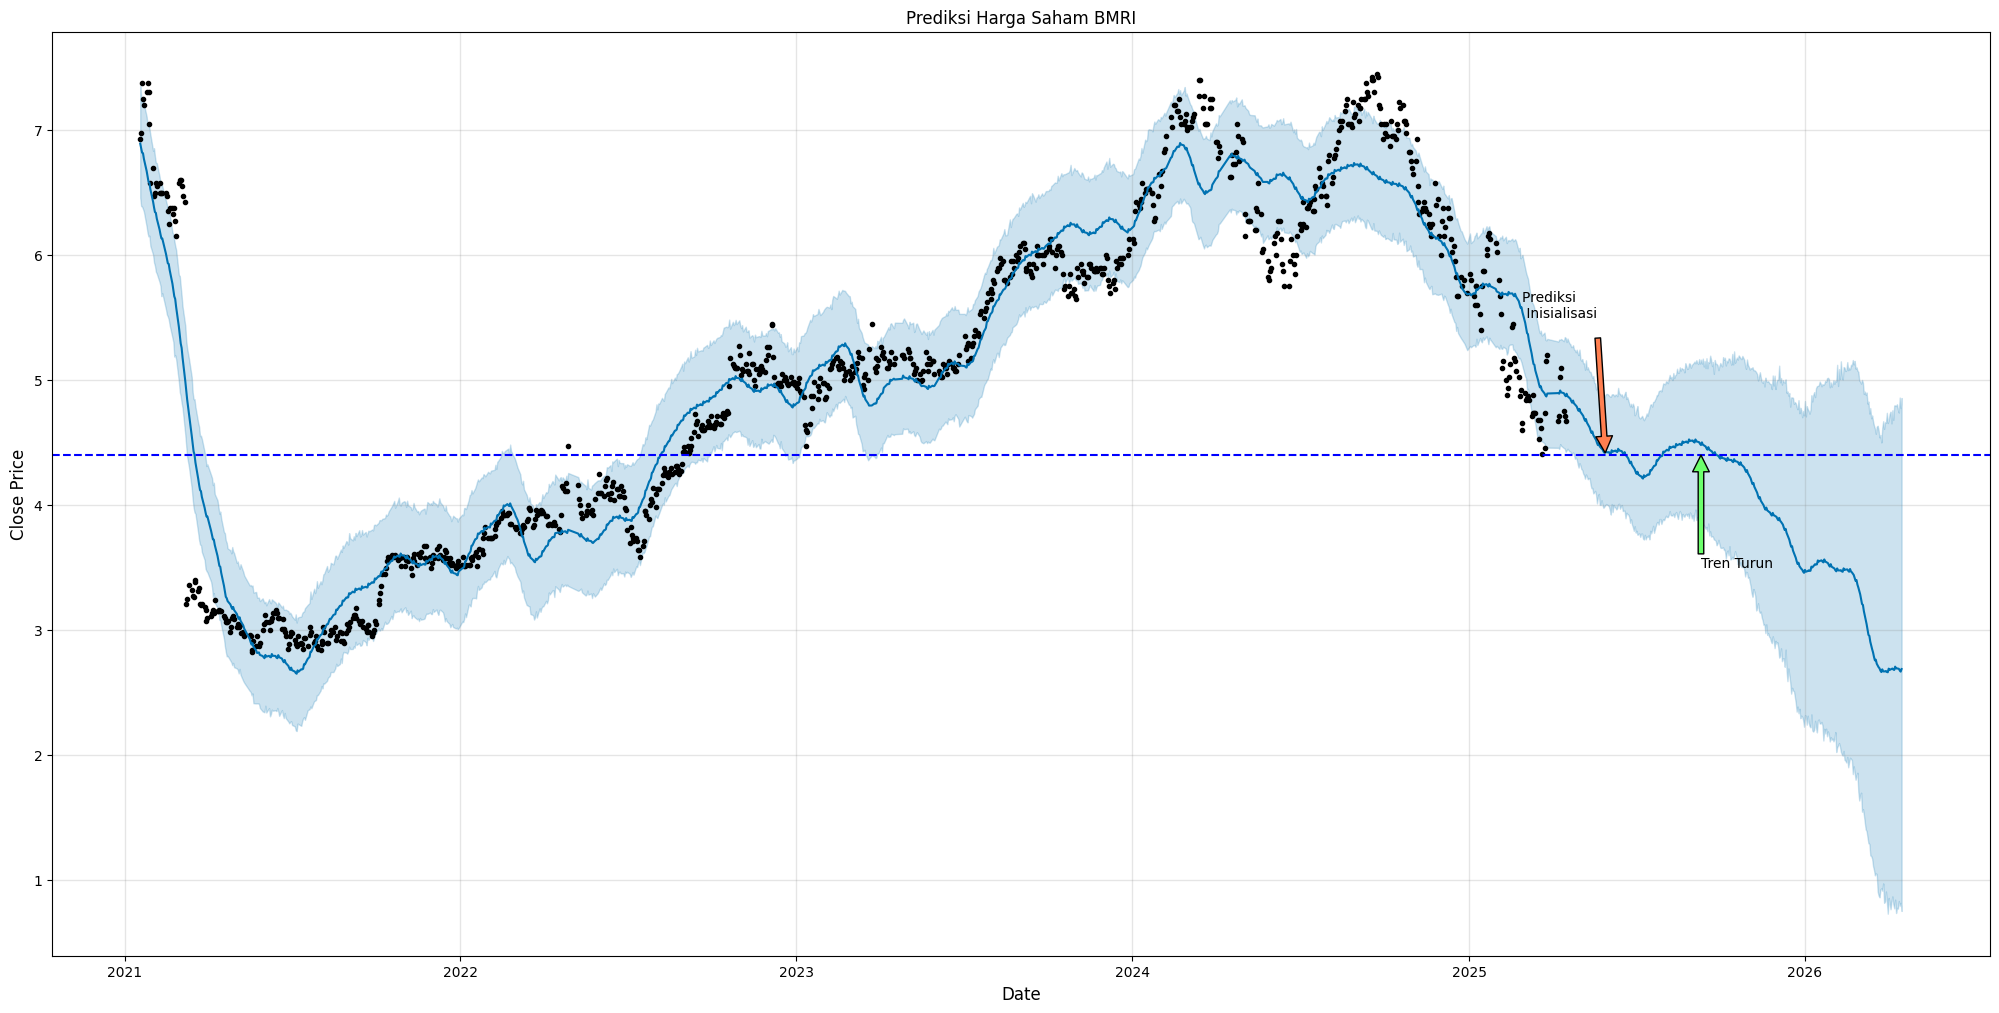

In [22]:
# Dates
start_date = dt.datetime(2025, 2, 27)
start_date1 = mdates.date2num(start_date)

trend_date = dt.datetime(2025, 9, 10)
trend_date1 = mdates.date2num(trend_date)

point_arrow = dt.datetime(2025, 5, 30)
point_arrow1 = mdates.date2num(point_arrow)

# plot
fig, ax1 = plt.subplots(figsize=(25, 12))
model.plot(predict, ax=ax1)
ax1.set_title('Prediksi Harga Saham BMRI')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Close Price', fontsize=12)

# anotasi
ax1.annotate('Prediksi \n Inisialisasi', xy=(point_arrow1, 4.3), xytext=(start_date1, 5.5), 
             arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
             )
ax1.annotate('Tren Turun', xy=(trend_date1, 4.4), xytext=(trend_date1, 3.5), 
             arrowprops=dict(facecolor='#6cff6c', shrink=0.0),
             )

ax1.axhline(y=4.4, color='b', linestyle='--')
plt.show()

Grafik tersebut menampilkan hasil prediksi harga saham BMRI di masa depan (garis biru) beserta data historisnya (titik-titik hitam) dan interval kepercayaan (araa bewarna biru muda). Terlihat bahwa model memprediksi adanya tren penurunan harga setelah pertengahan tahun 2025, setelah sebelumnya mengalami fluktuasi dan kenaikan hingga awal tahun 2024. Garis horizontal biru putus-putus menandai level harga tertentu dan anotasi dengan panah menyoroti titik 'Prediksi Inisialisasi' serta mengindikasikan adanya 'Tren Turun' yang diprediksi oleh model. Interval kepercayaan memberikan gambaran mengenai rentang kemungkinan harga di masa depan sehingga menunjukkan tingkat ketidakpastian prediksi seiring berjalannya waktu.

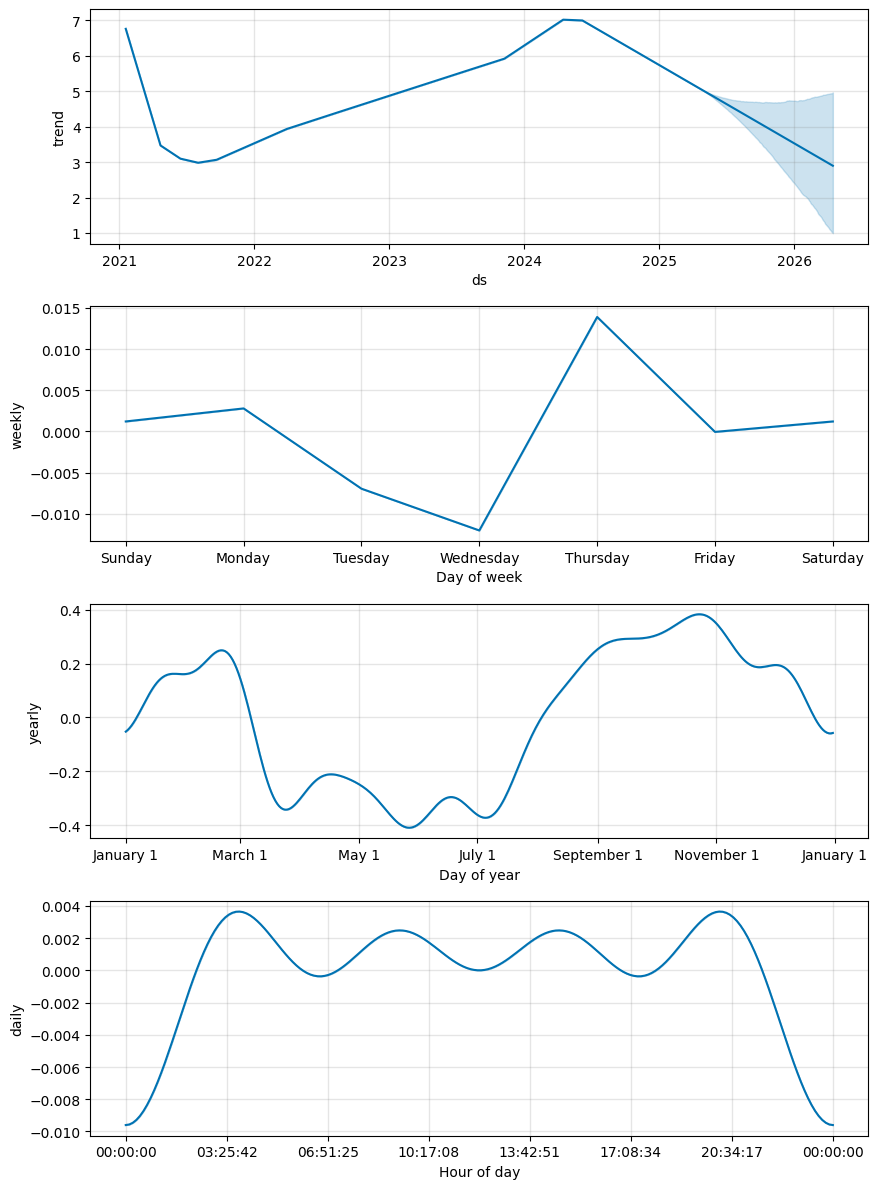

In [ ]:
# Menampilkan komponen tren, musiman tahunan, dll
fig2 = model.plot_components(predict)
plt.show()

Gambar tersebut menyajikan dekomposisi model Prophet terhadap prediksi harga saham BMRI yang menampilkan tren dasar yang cenderung meningkat hingga pertengahan tahun 2024 kemudian menurun, pola mingguan yang menunjukkan variasi kecil dengan puncak hari Kamis dan lembah pada hari Rabu, pola tahunan yang memperlihatkan fluktuasi signifikan sepanjang tahun dengan kenaikan di sekitar akhir tahun dan penurunan di pertengahan tahun, serta pola harian yang menunjukkan perubahan dalam sehari namun dengan skala yang jauh lebih kecil dibandingkan pola mingguan dan tahunan. Analisis komponen-komponen ini membantu memahami faktor-faktor temporal yang mempengaruhi prediksi harga saham BMRI.

## Evaluation

In [ ]:
# Melakukan cross-validation pada model Prophet untuk mengevaluasi performa prediksi historis
cv_data = cross_validation(model, initial='365 days', period='180 days', horizon = '120 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/6 [00:00<?, ?it/s]10:37:36 - cmdstanpy - INFO - Chain [1] start processing
10:37:37 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 1/6 [00:01<00:05,  1.04s/it]10:37:37 - cmdstanpy - INFO - Chain [1] start processing
10:37:38 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 2/6 [00:02<00:04,  1.15s/it]10:37:39 - cmdstanpy - INFO - Chain [1] start processing
10:37:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 3/6 [00:03<00:03,  1.29s/it]10:37:40 - cmdstanpy - INFO - Chain [1] start processing
10:37:40 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 4/6 [00:04<00:02,  1.22s/it]10:37:41 - cmdstanpy - INFO - Chain [1] start processing
10:37:42 - cmdstanpy - INFO - Chain [1] done processing
 83%|████████▎ | 5/6 [00:06<00:01,  1.35s/it]10:37:43 - cmdstanpy - INFO - Chain [1] start processing
10:37:44 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 6/6 [00:08<00:00,  1.36s/it]


In [25]:
# Melihat hasil cross validation
cv_data.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
463,2025-04-10,6.550223,6.050964,7.060181,5.025,2024-12-17
464,2025-04-11,6.545801,6.067709,7.071509,5.100,2024-12-17
465,2025-04-14,6.570743,6.113363,7.081733,4.750,2024-12-17
466,2025-04-15,6.566487,6.069137,7.046106,4.710,2024-12-17
467,2025-04-16,6.566261,6.070250,7.094888,4.670,2024-12-17


Gambar tersebut menampilkan sebagian kecil dari hasil model prediksi harga saham BMRI. Terlihat prediksi harga ``yhat`` untuk beberapa tanggal di bulan April 2025 beserta batas bawah ``yhat_lower`` dan batas atas ``yhat_upper`` dari interval kepercayaannya. Kolom ``y`` menunjukkan nilai harga saham aktual pada tanggal tersebut yang dapat dibandingkan dengan nilai prediksi. Kolom ``cutoff`` menunjukkan tanggal terakhir data yang digunakan untuk melatih model dalam proses evaluasi ini, yaitu 17 Desember 2024. Dengan membandingkan ``yhat`` dengan ``y``.

In [29]:
# Melihat performance metrics
pm_data = performance_metrics(cv_data)
pm_data.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,13 days,0.201293,0.448657,0.374858,0.069353,0.058250,0.067270,0.510870
1,14 days,0.197383,0.444278,0.379298,0.071784,0.061732,0.069640,0.510870
2,15 days,0.182637,0.427360,0.369591,0.070135,0.058250,0.068290,0.500000
3,16 days,0.202341,0.449823,0.396143,0.075098,0.066379,0.073233,0.440217
4,17 days,0.216986,0.465818,0.416417,0.079042,0.073964,0.077230,0.378261


Gambar tersebut menyajikan metrik evaluasi kinerja model prediksi harga saham BMRI untuk berbagai horizon waktu, mulai dari 13 hingga 17 hari ke depan. Terlihat bahwa nilai Mean Squared Error (MSE) dan Root Mean Squared Error (RMSE) cenderung meningkat seiring dengan bertambahnya horizon prediksi yang mengindikasikan peningkatan kesalahan prediksi. Demikian pula, nilai Mean Absolute Error (MAE) dan Symmetric Mean Absolute Percentage Error (SMAPE) juga menunjukkan tren peningkatan kesalahan relatif terhadap horizon waktu. Sebaliknya, nilai coverage yang menunjukkan proporsi data aktual yang berada dalam interval prediksi yang cenderung menurun seiring dengan bertambahnya horizon yang menandakan penurunan kepercayaan model dalam merangkum nilai aktual di masa depan.

In [30]:
# Melihat performance metrics
pm_data = performance_metrics(cv_data)
pm_data.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
103,116 days,0.435079,0.659606,0.504491,0.090065,0.072105,0.086570,0.793478
104,117 days,0.432554,0.657688,0.507590,0.090492,0.072105,0.087016,0.793478
105,118 days,0.492161,0.701542,0.538932,0.097361,0.072619,0.092496,0.771739
106,119 days,0.554899,0.744915,0.566427,0.104115,0.073275,0.097730,0.760870
107,120 days,0.625957,0.791175,0.591422,0.110177,0.073275,0.102258,0.739130


Gambar ini melanjutkan evaluasi model prediksi harga saham BMRI untuk horizon waktu yang lebih panjang, yaitu 116 hingga 120 hari ke depan. Terlihat bahwa metrik kesalahan seperti MSE, RMSE, MAE, MAPE, MDAPE, dan SMAPE secara umum menunjukkan tren peningkatan seiring dengan bertambahnya horizon prediksi yang konsisten dengan pengamatan pada horizon waktu yang lebih pendek. Hal ini mengindikasikan bahwa akurasi prediksi model cenderung menurun ketika mencoba memprediksi harga saham untuk jangka waktu yang lebih jauh ke depan. Sementara itu, nilai coverage juga menunjukkan penurunan yang bertahap yang berarti model menjadi kurang yakin dalam mencakup nilai aktual dalam interval prediksinya untuk horizon yang lebih panjang.

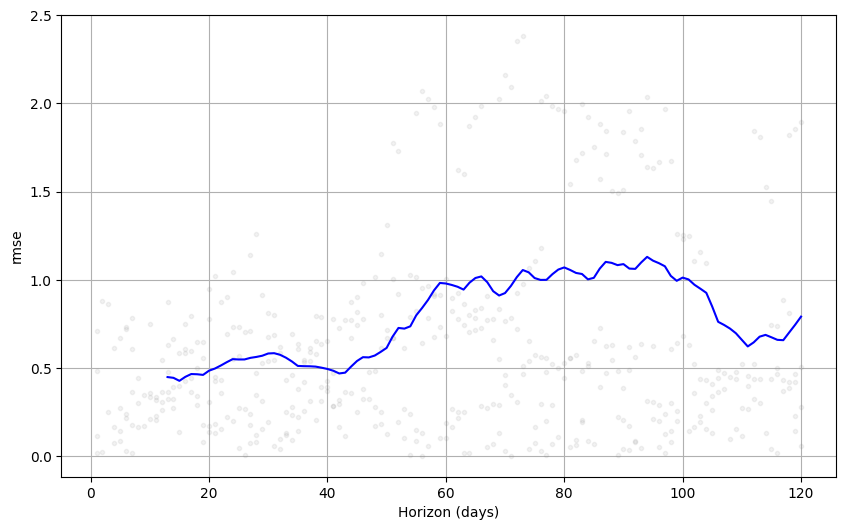

In [31]:
# Visualiasi RMSE
plot_cross_validation_metric(cv_data, metric="rmse")
plt.show()

## Deployment

### untuk tahap deployment dijalankan di file dashboard.py

## Kesimpulan

Model Prophet yang digunakan mampu menangkap pola tren dan musiman dari pergerakan harga saham BMRI. Hal ini terlihat dari hasil dekomposisi komponen tren dan seasonalitas yang ditampilkan oleh model. Namun, semakin jauh waktu prediksi ke depan, akurasi model cenderung menurun. Ini ditunjukkan oleh meningkatnya nilai kesalahan serta melemahnya tingkat kepercayaan model. Untuk prediksi jangka pendek, misalnya untuk beberapa hari ke depan, hasilnya lebih akurat dan bisa dijadikan pertimbangan. Sementara untuk jangka panjang seperti beberapa bulan ke depan hasil prediksi menjadi lebih tidak pasti dan yang terlihat dari rentang interval kepercayaan yang semakin lebar. Kesimpulannya, model Prophet cukup membantu untuk melihat arah pergerakan harga saham dalam waktu dekat. Namun, hasil prediksi tetap perlu ditafsirkan dengan hati-hati terutama jika digunakan untuk investasi jangka panjang.